<a href="https://colab.research.google.com/github/8220suru/suresh/blob/main/Association_Rules_my__movies_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.simplefilter("ignore")

# 1 - Business Problem

Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

2 - Data collection and description

In [3]:
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies.csv


In [4]:
df = pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [7]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [9]:
df1.shape

(10, 10)

In [10]:
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

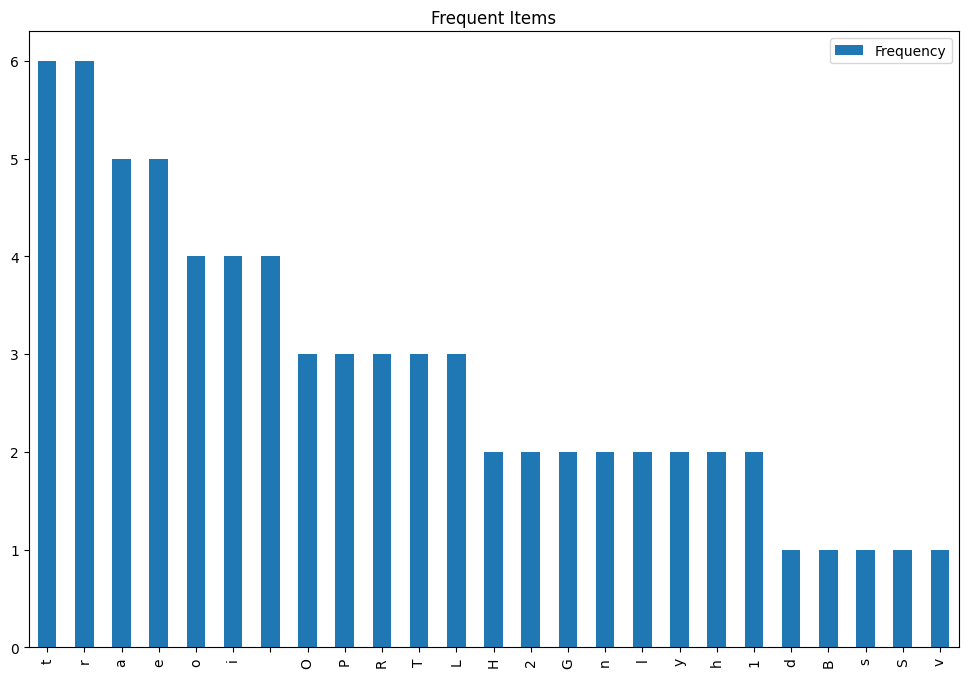

In [11]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# 3 - Apriori algorithm

In [12]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [13]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [14]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [15]:
confs = []

In [16]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

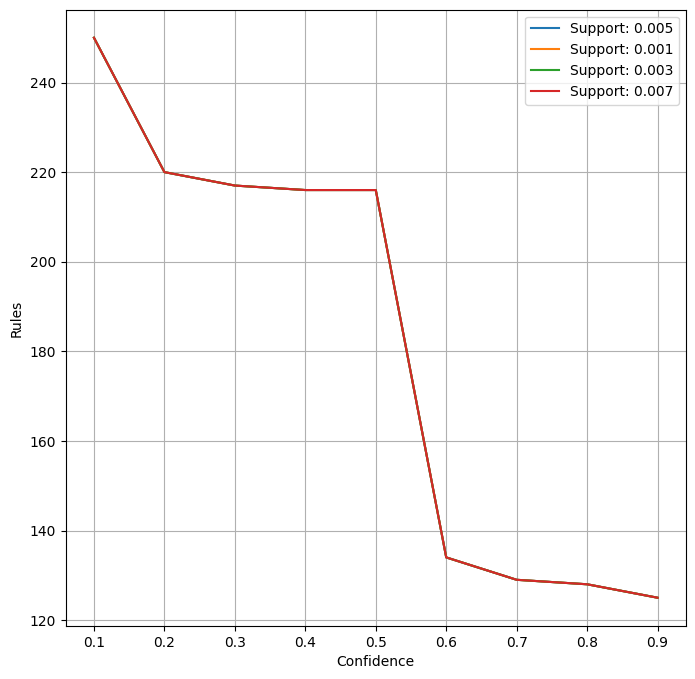

In [17]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# 4 - Conclusiom

As shown in above graph

1.Lower the Confidence level Higher the no. of rules.

2.Higher the Support, lower the no. of rules.

# Lets try with Support 0.005 and Confidence at 0.4

In [18]:
ap_final =  apriori(ap,0.005,True)
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
...,...,...,...,...,...,...,...,...,...
113719,"(2, )","(r, t, P, H, y, a, o, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113723,"(y, 2)","(r, t, P, H, , a, o, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113724,"(a, 2)","(r, t, P, H, , y, o, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113726,"(o, 2)","(r, t, P, H, , y, a, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [19]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

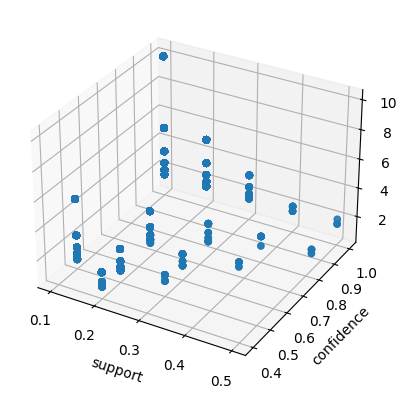

In [20]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

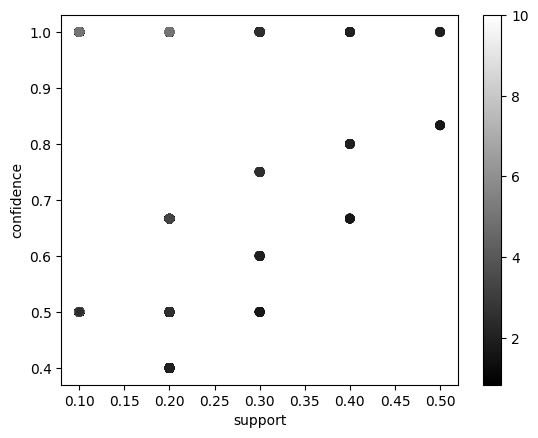

In [21]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")